In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pickle

pd.options.display.max_columns=999
warnings.filterwarnings("ignore")
%matplotlib inline

# Prediksi Jumlah Pelanggan Rental Sepeda


## Latar Belakang

### Tren Bersepeda
Sepeda memang beberapa tahun terakhir sudah menjadi tren di Indonesia sejak program Bike To Work. Tetapi belakangan ini saat era New Normal diberlakukan bersepeda menjadi salah satu olahraga yang digemari oleh semua kalangan. Sebelum era New Normal sepeda hanya digandrungi oleh komunitas atau kelompok sepeda, tetapi sekarang hampir semua kalangan melakukan olahraga bersepeda. Bahkan di era New Normal jumlah pesepeda mengalami peningkatan yang cukup signifikan dibandingkan saat New Normal belum diterapkan.

### Faktor Meningkatnya Jumlah Pesepeda Saat New Normal
- Khawatir jika menggunakan transportasi umum.
- Pembatasan kendaraan baik umum atau pribadi.
- Mulai sadar akan pentingnya olahraga untuk menginkatkan imunitas tubuh.
- Olahraga yang tidak kontak langsung dengan orang lain.
- Bertepatan dengan musim kemarau.
- Semakin banyaknya ruas jalur khusus pesepeda. 
- Ingin mengikuti tren saat ini.

### Akibat Meningkatnya Jumlah Pesepeda Saat New Normal
Akibat dari  meningkatknya jumlah orang yang bersepeda harga sepeda naik hampir 2x dari harga biasanya bahkan harga sepeda bekas pun harga jualnya lebih mahal dari pada saat sepeda tersebut pertama dibeli. Selain itu stok sepeda di toko-toko pun mulai kehabisan hingga kita harus memesan terlebih dahulu jika ingin membeli sepeda. Karena hal-hal tersebut tentunya tidak semua orang bisa membeli sepeda, namun karena ingin mengikuti tren banyak yang ingin tetap bersepeda, tetapi bagaimana caranya? Tentunya dengan cara rental sepeda.

### Bisnis Rental Sepeda
Bisnis rental sepeda merupakan jasa untuk peminjaman sepeda kepada perorangan atau kelompok, dan biasanya disewakan dalam hitungan per jam atau bahkan per hari. Makin maraknya pesepeda pada era New Normal seperti saat ini, bisnis rental sepeda menjadi salah satu bisnis yang mulai dilirik. Bahkan penyedia jasa wisata, tempat wisata dan Event Organizer mulai melirik bisnis rental sepeda karena potensi bisnis dikala tren sepeda saat ini. Pelaku bisnis yang sudah menjalankan bisnis rental sepeda bahkan mengaku slot penyewaan sepeda selalu penuh bahkan harus booking terlebih dahulu agar mendapat antrian. Tentunya hal tersebut cukup disayangkan karena bisa jadi orang pindah tempat penyewaan dan kita tidak dapat memperoleh keuntungan yang maksimal. Selain itu para pelaku bisnis rental sepeda pun ingin armada yang tersedia dapat dimanfaatkan secara maksimal atau terpakai seluruhnya.

### Problem
Bagaimana cara menentukkan atau memprediksi berapa jumlah pelanggan yang akan melakukan penyewaan sepeda agar dapat menentukkan jumlah sepeda yang akan dikerahkan atau dapat memaksimalkan jumlah sepeda yang dikerahkan agar memperoleh keuntungan yang maksimal?

### Goals
Dapat memprediksi atau menentukkan jumlah pelanggan yang akan menggunakan jasa rental sepeda untuk dapat menentukkan jumlah sepeda yang dikerahkan agar jumlah sepeda yang dikerahkan tidak kekurangan dan dapat memaksimalkan jumlah sepeda yang ada agar memperoleh keuntungan yang maksimal.

# Import Data and Data Cleaning

In [2]:
df = pd.read_csv('london_merged.csv',parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Keterangan:
1. timestamp     : Waktu penyewaan sepeda
2. cnt           : Jumlah penyewa sepeda
3. t1            : Suhu udara (Celcius)
4. t2            : Suhu yang dirasakan tubuh (Celcius)
5. hum           : Persentase kelembapan udara
6. wnd_speed     : Kecepatan angin (km/h)
7. weather_code  : Kode cuaca
    - 1  : Cerah
    - 2  : Sedikit berawan
    - 3  : Awan pecah - pecah
    - 4  : Berawan
    - 7  : Hujan ringan
    - 10 : Hujan disertai badai petir
    - 26 : Salju
8. is_holiday    : Apakah hari libur atau bukan (0 : Tidak, 1 : Ya)
9. is_weekend    : Apakah akhir pekan atau bukan (0 : Tidak, 1 : Ya)
10. season      : Musim
    - 0 : Musim semi
    - 1 : Musim panas
    - 2 : Musim gugur
    - 3 : Musim dingin

Selanjutnya akan dilakukang pengecekan pada data apakah terdapat data yang bernilai Null atau tidak.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Pada data tidak terdapat nilai Null. Selanjutnya dari kolom timestamp akan dibagi menjadi tahun, bulan tanggal, hari, dan jam.

In [5]:
date = df['timestamp'].dt

In [6]:
df["Tahun"] = date.year

In [7]:
df["Bulan"] = date.month

In [8]:
df["Tanggal"] = date.day

In [9]:
df['Hari'] = date.day_name()

In [10]:
df['Jam'] = date.hour

In [11]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Tahun,Bulan,Tanggal,Hari,Jam
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,Sunday,4


Selanjutnya tahun 2017 akan kita drop atau tidak digunakan.

In [12]:
df = df[df['Tahun']<2017]

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17342.0,1145.674778,1085.923396,0.0,260.0,846.0,1676.0,7860.0
t1,17342.0,12.500308,5.558676,-1.5,8.5,12.5,16.0,34.0
t2,17342.0,11.562094,6.595059,-6.0,6.0,12.5,16.0,34.0
hum,17342.0,72.275127,14.315691,20.5,63.0,74.5,83.0,100.0
wind_speed,17342.0,15.917921,7.904525,0.0,10.0,15.0,20.5,56.5
weather_code,17342.0,2.720505,2.334892,1.0,1.0,2.0,3.0,26.0
is_holiday,17342.0,0.020759,0.142580,0.0,0.0,0.0,0.0,1.0
is_weekend,17342.0,0.285204,0.451524,0.0,0.0,0.0,1.0,1.0
season,17342.0,1.485815,1.116996,0.0,0.0,1.0,2.0,3.0
Tahun,17342.0,2015.501615,0.500012,2015.0,2015.0,2016.0,2016.0,2016.0


In [14]:
df.describe(include='O').T

,count,unique,top,freq
Hari,17342,7,Thursday,2492


In [15]:
# df.to_csv('df_clean.csv')

# Exploratory Data Analysis

### Hipotesis

- Suhu, kelembapan, kecepatan angin, musim, tanggal dan apakah itu hari libur, weekend atau hari biasa mempengaruhi jumlah penyewa sepeda.

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Tahun,Bulan,Tanggal,Hari,Jam
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,Sunday,4


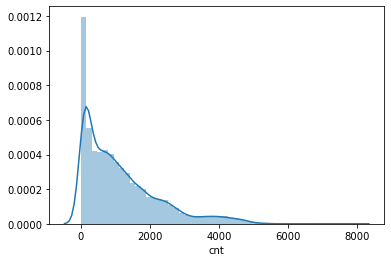

In [17]:
sns.distplot(df['cnt'])

Kolom target yaitu 'cnt' datanya tidak berdistribusi normal.

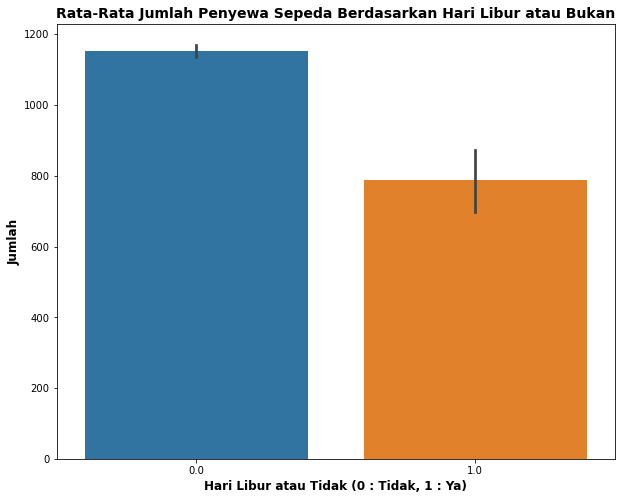

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x='is_holiday', y='cnt', data=df)
plt.xlabel('Hari Libur atau Tidak (0 : Tidak, 1 : Ya)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Hari Libur atau Bukan', fontweight = 'bold', fontsize = 14)
plt.show()

In [19]:
df.groupby(['is_holiday'])['cnt'].mean()

is_holiday
0.0    1153.257390
1.0     787.986111
Name: cnt, dtype: float64

Jika dilihat dari plot di atas jumlah rata-rata orang yang melakukan penyewaan sepeda pada hari biasa cukup berbeda jauh jika dibandingkan dengan hari libur, mungkin dikarenakan lebih banyaknya pelanggan yang menyewa sepeda untuk kebutuhan berangkat atau pulang kerja, dan saat liburan jalanan cukup ramai oleh kendaraan sehingga jumlah penyewa sepeda pada hari libur lebih rendah dibandingkan dengan hari biasa.

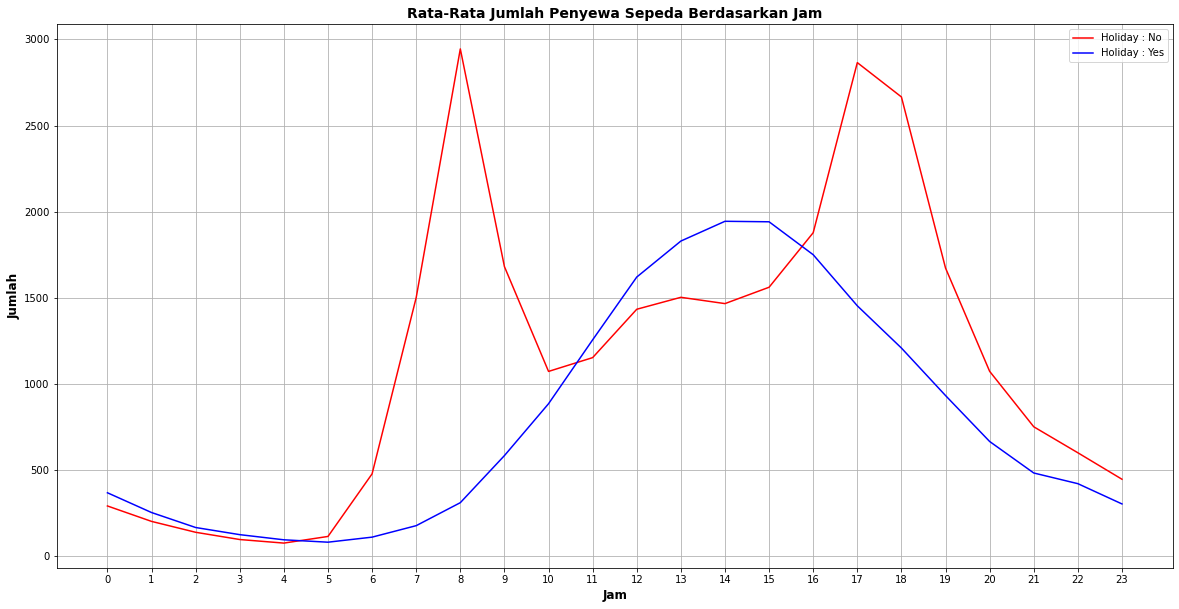

In [20]:
plt.figure(figsize=(20,10))
df[df['is_holiday']==0].groupby('Jam')['cnt'].mean().plot(kind='line',color='r')
df[df['is_holiday']==1].groupby('Jam')['cnt'].mean().plot(kind='line',color='b')
plt.grid(True)
plt.xlabel('Jam', fontweight = 'bold', fontsize = 12)
plt.xticks(np.arange(0,24))
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Jam', fontweight = 'bold', fontsize = 14)
plt.legend(['Holiday : No', 'Holiday : Yes'])
plt.show()

Bisa dilihat berdasar berdasarkan jam pada hari biasa pada jam 8 rata-rata penyewa sepeda lebih tinggi dibandingkan yang lain karena di London orang mulai masuk kerja sekitar jam 08.50 sehingga pada jam 8 banyak orang-orang disana yang menyewa sepeda untuk kebutuhan berkangkat ke kantor, dan sama halnya pada jam 17 dan 18 yang merupakan jam pulang kerja sehingga pada jam tersebut rata-rata penyewaan sepeda juga lumayan tinggi. Berbeda pada saat hari libur, rata-rata tertinggi penyewa sepeda terjadi pada jam 13 hingga 15.

In [21]:
pd.crosstab(index=df['weather_code'], columns=df['is_holiday'], values=df['cnt'], aggfunc='mean')

is_holiday,0.0,1.0
weather_code,,
1.0,1175.780354,671.120968
2.0,1500.216271,1339.304348
3.0,1201.384771,939.478873
4.0,639.953943,356.625000
7.0,725.449903,460.211268
10.0,583.428571,NaN
26.0,255.758621,107.000000


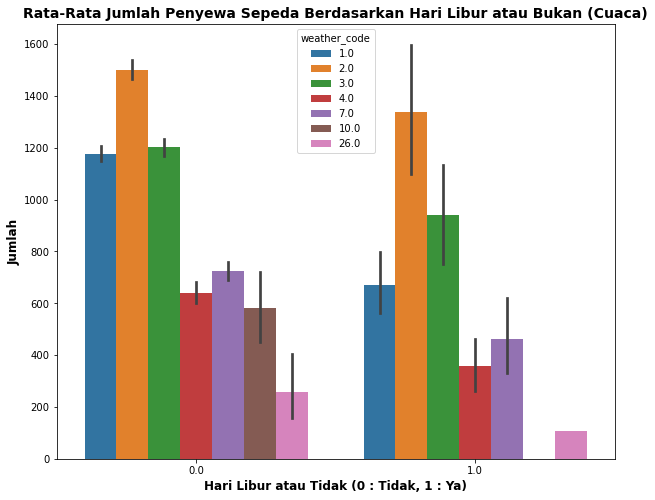

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x='is_holiday', y='cnt', data=df, hue='weather_code')
plt.xlabel('Hari Libur atau Tidak (0 : Tidak, 1 : Ya)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Hari Libur atau Bukan (Cuaca)', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat dari cucaca ternyata saat hari libur rata-rata paling tinggi penyewaaan sepeda terjadi pada saat cuaca sedikit berawan dan sama halnya dengan hari libur pada hari biasa rata-rata paling tinggi penyewaan sepeda teerjadi saat cuaca sedikit berawan. Untuk pada saat hari libur dan bukan jumlah penyewaan sepeda rata-rata paling rendah terjadi pada saat turun salju karena kondisi jalan yang licin memang cukup berbahaya bersepeda baik untuk olahraga ataupun jalan-jalan saat terjadi hujan salju.

In [23]:
pd.crosstab(index=df['season'], columns=df['is_holiday'], values=df['cnt'], aggfunc='mean')

is_holiday,0.0,1.0
season,,
0.0,1113.428129,893.807292
1.0,1470.567873,912.812500
2.0,1178.954218,NaN
3.0,834.257612,568.741667


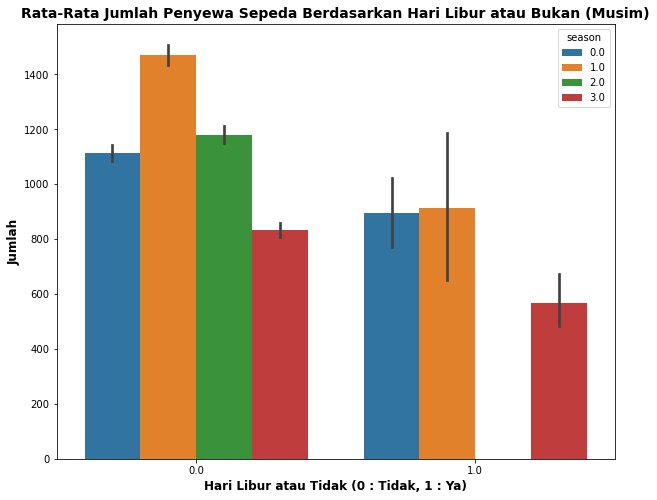

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x='is_holiday', y='cnt', data=df, hue='season')
plt.xlabel('Hari Libur atau Tidak (0 : Tidak, 1 : Ya)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Hari Libur atau Bukan (Musim)', fontweight = 'bold', fontsize = 14)
plt.show()

Jika berdasarkan musim baik itu saat hari libur atau bukan rata-rata paling tinggi penyewaan sepeda terjadi pada saat musim panas dan untuk paling rendah pada saat musim dingin atau salju. Karena sasat musim panas lebih banyak orang yang beraktivitas di luar rumah, karena di negara 4 musim seperti London orang-orang itu lebih cenderung menyukai cuaca yang panas, dan pada musim panas waktu siang lebih lama jika dibandingkan dengan waktu malam.

In [25]:
df.groupby(['is_weekend'])['cnt'].mean()

is_weekend
0.0    1211.435705
1.0     980.860291
Name: cnt, dtype: float64

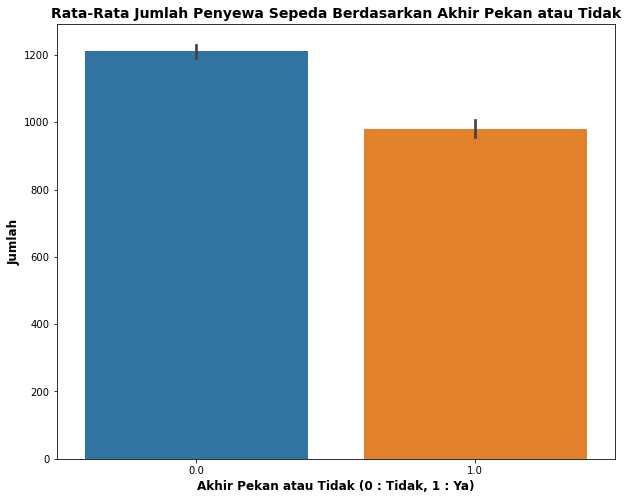

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x='is_weekend', y='cnt', data=df)
plt.xlabel('Akhir Pekan atau Tidak (0 : Tidak, 1 : Ya)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Akhir Pekan atau Tidak', fontweight = 'bold', fontsize = 14)
plt.show()

Sama halnya dengan hari libur atau bukan, rata-rata pelanggan yang melakukan penyewaan sepeda pada akhir pekan lebih rendah dibandingkan dengan hari biasa.

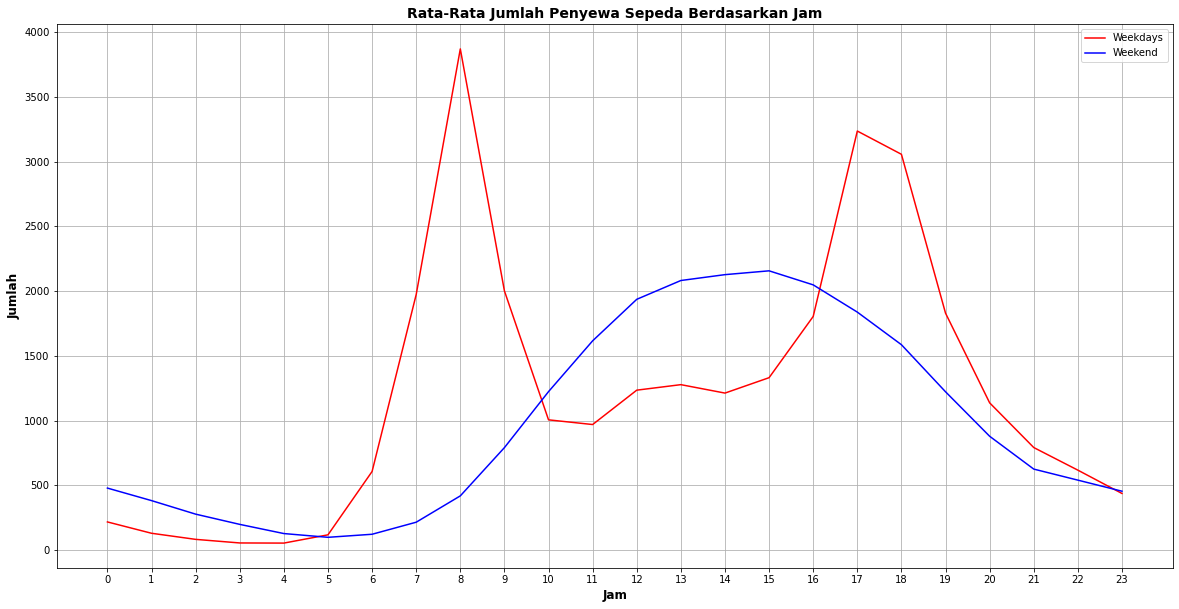

In [27]:
plt.figure(figsize=(20,10))
df[df['is_weekend']==0].groupby('Jam')['cnt'].mean().plot(kind='line',color='r')
df[df['is_weekend']==1].groupby('Jam')['cnt'].mean().plot(kind='line',color='b')
plt.grid(True)
plt.xlabel('Jam', fontweight = 'bold', fontsize = 12)
plt.xticks(np.arange(0,24))
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Jam', fontweight = 'bold', fontsize = 14)
plt.legend(['Weekdays', 'Weekend'])
plt.show()

Diilihait berdasarkan jam pun pada jam berangkat kerja dan pulang kerja rata-rata jumlah penyewaan sepeda lebih tinggi dibandingkan dengan jam lainnya, berbeda pada saat akhir pekan rata-rata jumlah penyewa sepeda tertinggi terjadi pada siang hari.

In [28]:
pd.crosstab(index=df['weather_code'], columns=df['is_weekend'], values=df['cnt'], aggfunc='mean')

is_weekend,0.0,1.0
weather_code,,
1.0,1231.902521,989.920739
2.0,1526.735707,1404.689441
3.0,1293.370704,978.890311
4.0,566.978771,744.069395
7.0,785.276342,548.896440
10.0,574.250000,638.500000
26.0,339.121212,144.230769


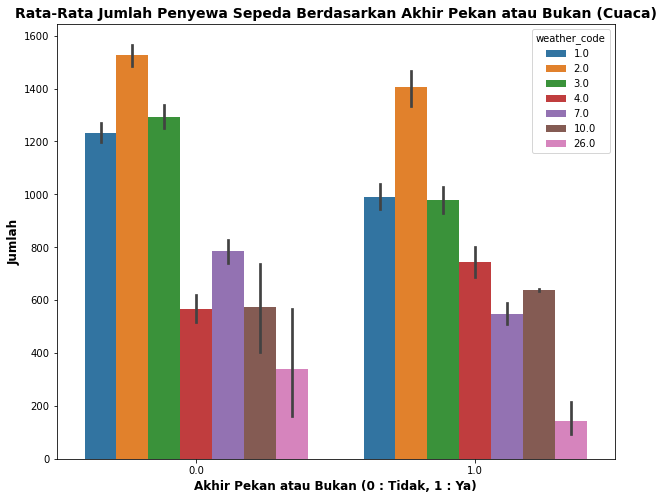

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x='is_weekend', y='cnt', data=df, hue='weather_code')
plt.xlabel('Akhir Pekan atau Bukan (0 : Tidak, 1 : Ya)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Akhir Pekan atau Bukan (Cuaca)', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat dari rata-rata berdasarkan cuaca, baik akhir pekan atau bukan paling tinggi terjadi pada saat cuaca sedikit berawan, dan rata-rata antara akhir pekan atau bukan pun tidak terlalu jauh. Paling rendah terjadi saat turun salju karena memang udara yang kurang baik untuk bersepeda dan jalanan yang licin cukup membahayakan.

In [30]:
pd.crosstab(index=df['season'], columns=df['is_weekend'], values=df['cnt'], aggfunc='mean')

is_weekend,0.0,1.0
season,,
0.0,1155.294043,975.113944
1.0,1495.814013,1385.527666
2.0,1264.146571,965.139478
3.0,922.320395,588.302956


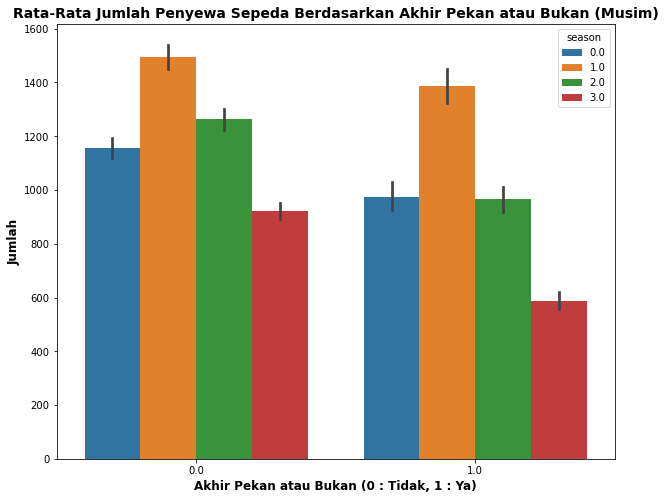

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x='is_weekend', y='cnt', data=df, hue='season')
plt.xlabel('Akhir Pekan atau Bukan (0 : Tidak, 1 : Ya)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Akhir Pekan atau Bukan (Musim)', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat dari rata-rata berdasarkan musim, baik akhir pekan atau bukan paling tinggi terjadi pada saat musim panas dan paling rendah terjadi pada saat musim dingin sama hallnya ketika hari libur.

In [32]:
df.groupby(['weather_code'])['weather_code'].count()

weather_code
1.0     6120
2.0     4027
3.0     3538
4.0     1457
7.0     2127
10.0      14
26.0      59
Name: weather_code, dtype: int64

In [33]:
df.groupby(['weather_code'])['cnt'].mean()

weather_code
1.0     1165.555229
2.0     1497.459151
3.0     1196.128886
4.0      635.286891
7.0      716.596145
10.0     583.428571
26.0     253.237288
Name: cnt, dtype: float64

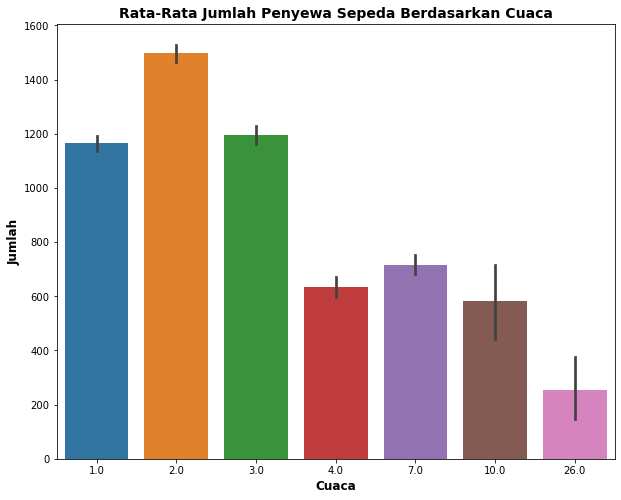

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='weather_code', y='cnt', data=df)
plt.xlabel('Cuaca', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Cuaca', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat hanya berdasarkan cuaca penyewaan sepeda paling tinggi terjadi saat sedikit berawan, karena mungkin cuaca tidak terlalu panas dan tidak khawatir akan terjadinya turunnya hujan karena tidak semua langit tertutupi oleh awan, sedangkan yang terendah terjadi ketika hujan salju karena cuaca yang dingin dan jalanan yang cukup licin menjadi faktor rendahnya jumlah penyewaan sepeda pada saat cuaca hujan salju.

In [35]:
df.groupby(['season'])['season'].count()

season
0.0    4394
1.0    4387
2.0    4303
3.0    4258
Name: season, dtype: int64

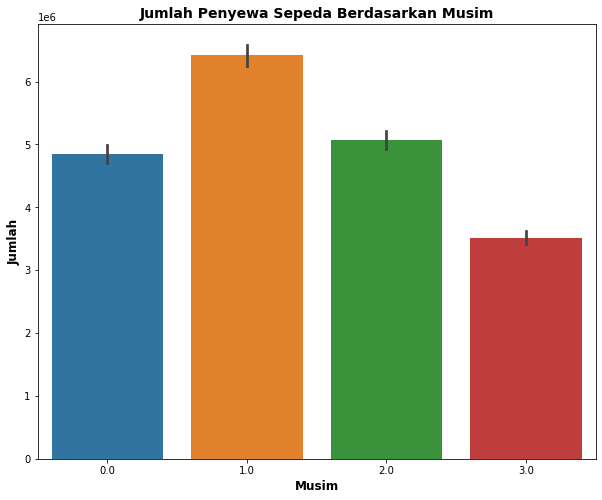

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='season', y='cnt', data=df, estimator=sum)
plt.xlabel('Musim', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim', fontweight = 'bold', fontsize = 14)
plt.show()

In [37]:
df.groupby(['season'])['cnt'].sum()

season
0.0    4850236
1.0    6424609
2.0    5073040
3.0    3520407
Name: cnt, dtype: int64

Jika dilihat berdasarkan musim paling tertinggi jumlah penyewaan sepeda terjadi pada saat musim panas dan paling rendah saat musim dingin. Karena pada musim panas cuaca yang mendukung untuk kita beraktifitas diluar karena anda tidak perlu menggunakan jaket tebal untuk beraktifitas pada musim panas seperti halnya pada musim lainnya sehingga anda bersepeda akan lebih nyaman, dan pada musim panas waktu siang jauh lebih lama dibandingkan dengan musim lain, sehingga pada musim tersebut masyarakat lebih aktif.

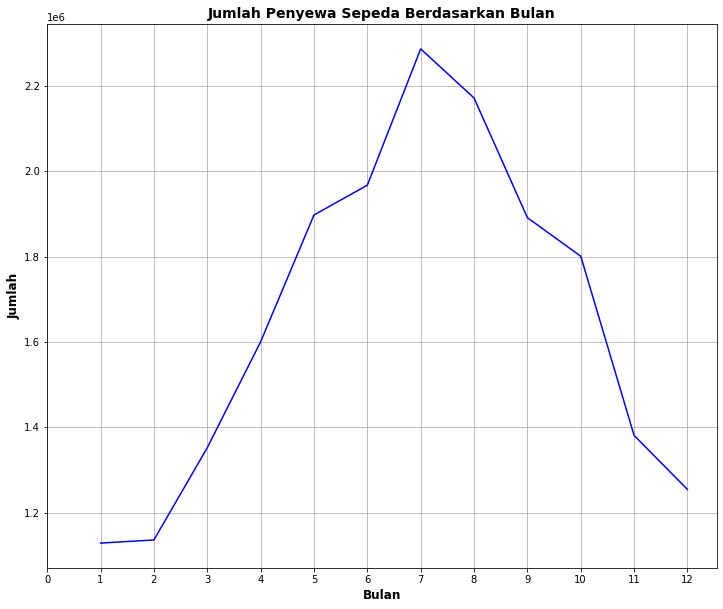

In [38]:
plt.figure(figsize=(12,10))
df.groupby('Bulan')['cnt'].sum().plot(kind='line',color='b')
plt.xlabel('Bulan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.grid(True)
plt.xticks(np.arange(0,13))
plt.title('Jumlah Penyewa Sepeda Berdasarkan Bulan', fontweight = 'bold', fontsize = 14)
plt.show()

Jika berdasarkan bulan penyewaan sepeda tertinggi terjadi pada bilan Juli karena pada bulan tersebut merupakan puncak musim panas sehingga banyak orang yang beraktivitas, sedangkan pada bulan Desember, Januari dan Februari jumlah penyewaan sepeda cukur rendah dikarenakan pada bulan tersebut merupakan musim dingin dan banyak orang yang mengurangi aktivitas diluar karena faktor cuaca.

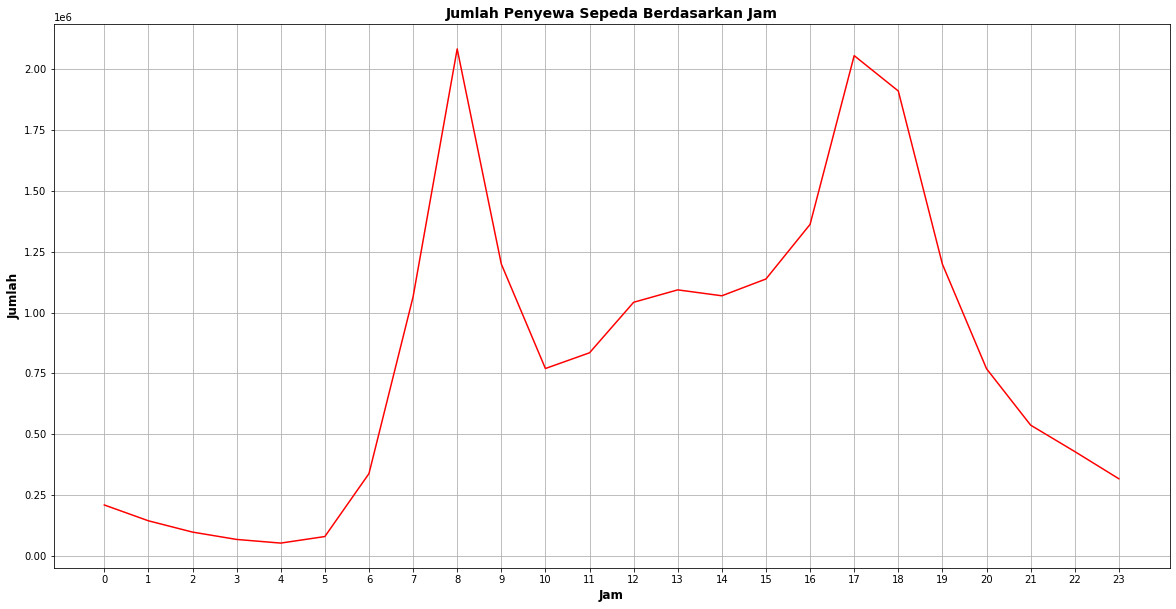

In [39]:
plt.figure(figsize=(20,10))
df.groupby('Jam')['cnt'].sum().plot(kind='line',color='r')
plt.xlabel('Jam', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.grid(True)
plt.xticks(np.arange(0,24))
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat berdasarkan jam secara keseluruhan jumlah penyewaan sepeda tertinggi terjadi pada jam 8, 17, dan 18 sedangkan paling rendah terjadi pada saat jam 12 malam sampai jam 5 pagi. 

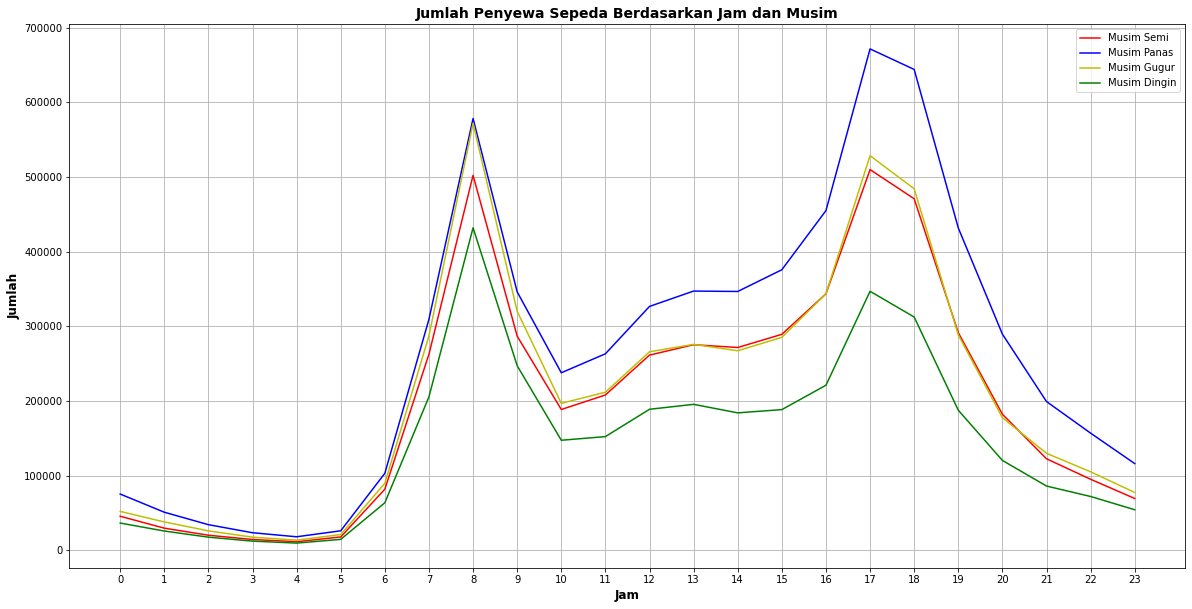

In [40]:
plt.figure(figsize=(20,10))
df[df['season']==0].groupby('Jam')['cnt'].sum().plot(kind='line',color='r')
df[df['season']==1].groupby('Jam')['cnt'].sum().plot(kind='line',color='b')
df[df['season']==2].groupby('Jam')['cnt'].sum().plot(kind='line',color='y')
df[df['season']==3].groupby('Jam')['cnt'].sum().plot(kind='line',color='g')
plt.xlabel('Jam', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.grid(True)
plt.xticks(np.arange(0,24))
plt.legend(['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam dan Musim', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat berdasarkan musim dan jam, setiap musim polanya hampir sama jika berdasarkan jam, pada 8, 17 dan 18 terjadi peningkatan yang cukup signifikan dibandingkan dengan jam lain.

Text(0.5, 1.0, 'Jumlah Penyewa Sepeda Berdasarkan Hari')

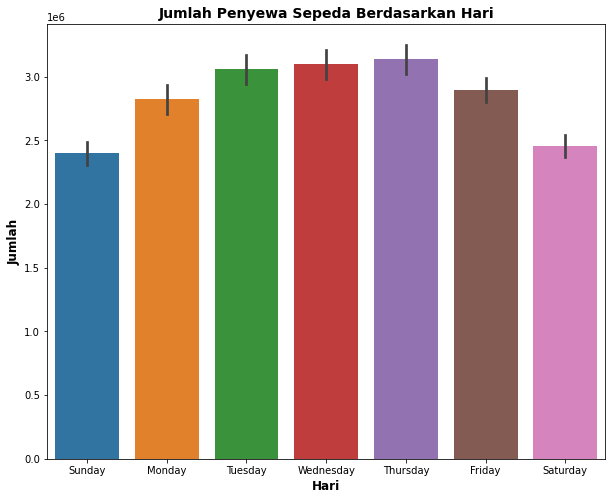

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(x='Hari', y='cnt', data=df, estimator=sum)
plt.xlabel('Hari', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Hari', fontweight = 'bold', fontsize = 14)

Jika dilihat berdasarkan hari jumlah penyewaan sepeda setiap harinya tidak berbeda jauh, hanya pada akhir pekan jumlahnya lebih sedikit dibandingkan dengan hari biasa.

Text(0.5, 1.0, 'Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Tanggal')

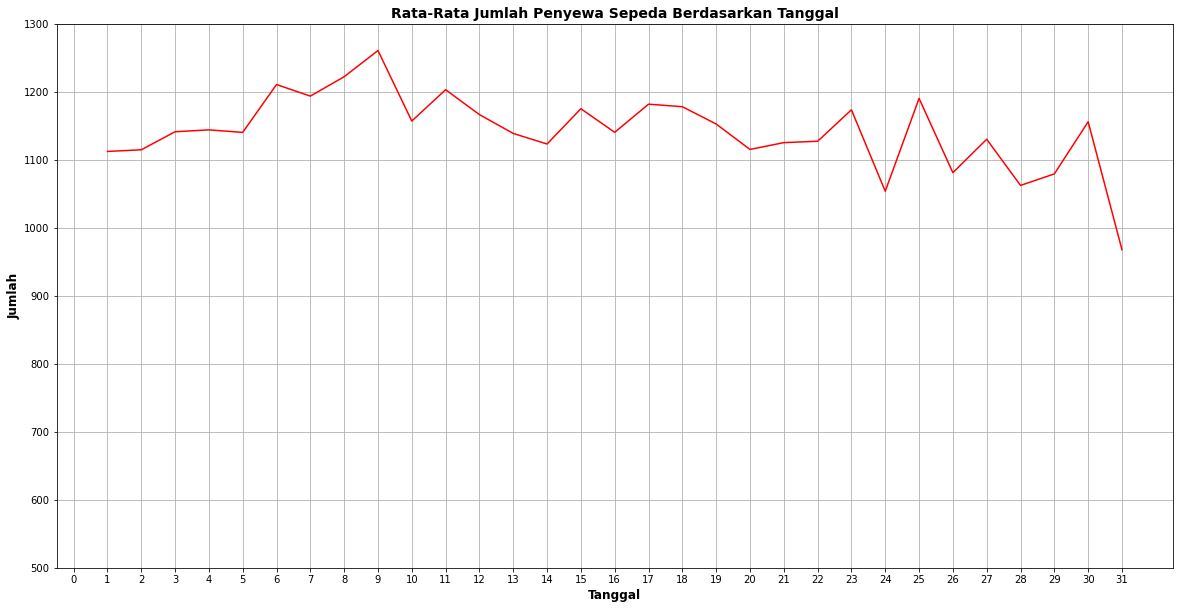

In [42]:
plt.figure(figsize=(20,10))
df.groupby('Tanggal')['cnt'].mean().plot(kind='line',color='r')
plt.xlabel('Tanggal', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.xticks(np.arange(0,32))
plt.ylim([500,1300])
plt.grid(True)
plt.title('Rata-Rata Jumlah Penyewa Sepeda Berdasarkan Tanggal', fontweight = 'bold', fontsize = 14)

Jika berdasarkan tanggal jumlah penyewaan sepeda tidak terlalu berpengaruh apakah itu awal pertengahan atau akhir bulan dan selalu naik turun pada setiap tanggalnya, tetapi terendah terjadi pada tanggal 31.

<Figure size 720x576 with 0 Axes>

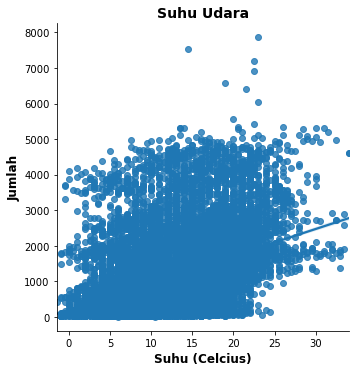

In [43]:
plt.figure(figsize=(10,8))
sns.lmplot(x='t1',y='cnt', data=df)
plt.xlabel('Suhu (Celcius)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Suhu Udara', fontweight = 'bold', fontsize = 14)
plt.show()

Dilihat dari persebaran data di atas suhu udara pengaruhnya tidak terlalu besar terhadap banyaknya jumlah penyewaan sepeda.

<Figure size 720x576 with 0 Axes>

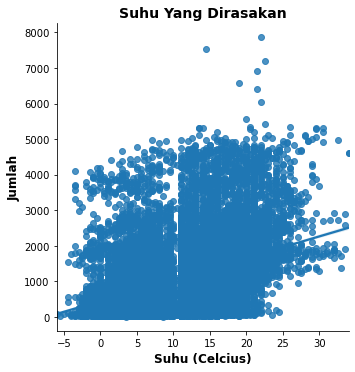

In [44]:
plt.figure(figsize=(10,8))
sns.lmplot(x='t2',y='cnt', data=df)
plt.xlabel('Suhu (Celcius)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Suhu Yang Dirasakan', fontweight = 'bold', fontsize = 14)
plt.show()

Dilihat dari persebaran data di atas suhu yang dirasakan pun tidak terlalu signifikan terhadap banyaknya jumlah penyewaan sepeda.

<Figure size 720x576 with 0 Axes>

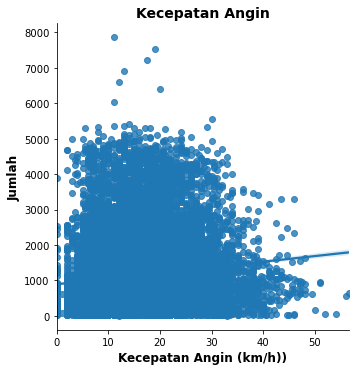

In [45]:
plt.figure(figsize=(10,8))
sns.lmplot(x='wind_speed',y='cnt', data=df)
plt.xlabel('Kecepatan Angin (km/h))', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Kecepatan Angin', fontweight = 'bold', fontsize = 14)
plt.show()

Kecepatan angin pengaruhnya tidak signifikan terhadap banyaknya jumlah penyewaan sepeda.

<Figure size 720x576 with 0 Axes>

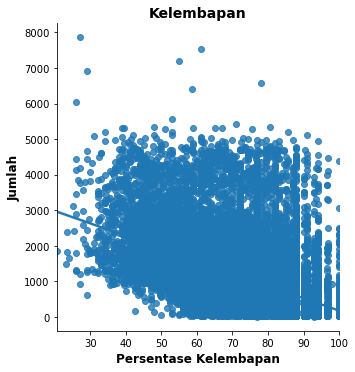

In [46]:
plt.figure(figsize=(10,8))
sns.lmplot(x='hum',y='cnt', data=df)
plt.xlabel('Persentase Kelembapan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Jumlah', fontweight = 'bold', fontsize = 12)
plt.title('Kelembapan', fontweight = 'bold', fontsize = 14)
plt.show()

Jika dilihat dari gambar di atas kelembapan pengaruhnya tidak terlalu tinggi terhadap banyaknya jumlah penyewa sepeda.

Selanjutnya kita akan lihat korelasi setiap feature.

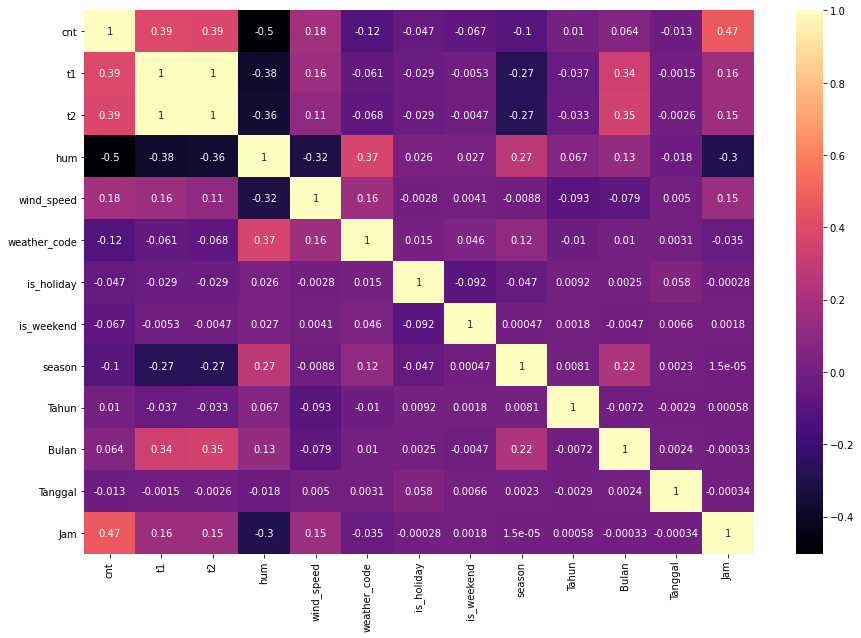

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr('spearman'),cmap='magma',annot=True)

Dilihat dari korelasi suhu udara, suhu yang dirasakan, kecepatan angin dan persentaset kelembapan memiliki korelasi yang tidak terlalu tinggi terhadap jumlah penyewa sepeda. Bisa dilihat dari gambar di atas korelasinya terhadap jumlah pelanggan masih dibawah 0.6 baik yang korelasi positif ataupun negatif.

# Handling Outlier

In [48]:
df = pd.read_csv('df_clean.csv',parse_dates=['timestamp'], index_col=0 )

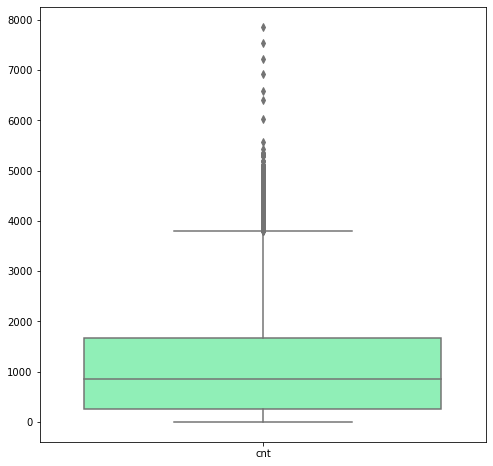

In [49]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df[['cnt']],palette='rainbow')
plt.show()

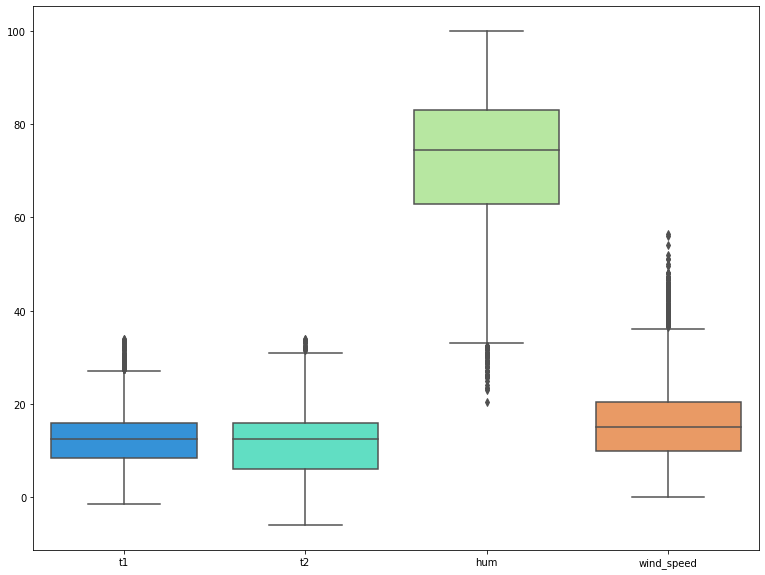

In [50]:
plt.figure(figsize=(13,10))
sns.boxplot(data=df[['t1','t2','hum','wind_speed']],palette='rainbow')
plt.show()

Terdapat beberapa outlier pada jumlah penyewa sepeda, suhu udara, suhu yang dirasakan, kelembapan dan kecepatan angin. Kita tidaka akan menghapus data tersebut dan akan tetap menggunakannya karena kita tetap ingin model bisa menebak saat jumlah pelanggan benar-benar tinggi atau ekstrim.

# Feature Engineering and Feature Selection

In [51]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Tahun,Bulan,Tanggal,Hari,Jam
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,Sunday,4


Kolom timestamp, t2, tahun, bulan, dan hari akan kita hapus, karena timestamp memang sudah tidak kita gunakan, untuk t2 sudah diwakilkan dengan t1, untuk tahun karena tahun yang terseida hanya 2015, 2016, dan 2017 bulan januari jadi tidak akan digunakan, bulan sudah diwakilkan oleh season dan hari sudah diwakilkan dengan is_weekend.

In [52]:
df.drop(columns=['timestamp','Tahun','Bulan','Hari','t2'],inplace=True)

In [53]:
df.head()

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Tanggal,Jam
0,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,4,0
1,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,4,1
2,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,4,2
3,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4,3
4,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4


Selanjutnya akan dilakukan binning pada kolom tanggal dan jam dengan pembagian seperti dibawah ini.

In [54]:
def tanggal(x):
    if 1<= x <=7:
        return "week_1"
    elif 8<= x <=14:
        return "week_2"
    elif 15<= x <=21:
        return "week_3"
    else:
        return "week_4"

def jam(x):
    if 0<= x <= 5:
        return " dini hari"
    elif 6<= x <=9:
        return "pagi"
    elif 10<= x <=15:
        return "siang"
    elif 16<= x <=19:
        return "sore"
    else:
        return "malam"
    



In [55]:
df['Tanggal'] = df['Tanggal'].apply(tanggal)
df['Jam'] = df['Jam'].apply(jam)

In [56]:
df.head()

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Tanggal,Jam
0,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,week_1,dini hari
1,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,week_1,dini hari
2,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,week_1,dini hari
3,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,week_1,dini hari
4,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,week_1,dini hari


Selanjutnya kita akan mengubah semua kolom kategori menjadi numerik dengan menggunakan get_dummies

In [57]:
df = pd.get_dummies(data=df, columns=['weather_code','season','Tanggal','Jam'])

In [58]:
df.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,season_0.0,season_1.0,season_2.0,season_3.0,Tanggal_week_1,Tanggal_week_2,Tanggal_week_3,Tanggal_week_4,Jam_ dini hari,Jam_malam,Jam_pagi,Jam_siang,Jam_sore
0,182,3.0,93.0,6.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
1,138,3.0,93.0,5.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,134,2.5,96.5,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
3,72,2.0,100.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
4,47,2.0,93.0,6.5,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


In [59]:
# df.to_csv('df_ML.csv')

# Spliting Data

In [60]:
df = pd.read_csv('df_ML.csv', index_col=0)

Selanjtunya akan dilakukan splitting data dengan 85% data menjadi train dan 15% data menjadi test nya.

In [61]:
X = df.drop(columns='cnt')
y = df['cnt']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .85, random_state = 1)

# Machine Learning Model

Algoritma yang akan digunakan untuk awal adalah Linear Regression, Elasticnet, Random Forest dan XGBoost dengan parameter default.

### Linear Regression

In [63]:
modelReg = LinearRegression()

In [64]:
modelReg.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred_reg = modelReg.predict(X_test)

In [66]:
y_pred_trainReg = modelReg.predict(X_train)

In [67]:
MAE = mean_absolute_error(y_test, y_pred_reg)
MSE = mean_squared_error(y_test, y_pred_reg)
RMSE = np.sqrt(MSE)
R_square = r2_score(y_test, y_pred_reg)
R_square_train = r2_score(y_train, y_pred_trainReg)

In [68]:
modelReg.intercept_

1929.597405966913

In [69]:
pd.DataFrame(index= X_train.columns, data = modelReg.coef_, columns = ['Coefficient'])

,Coefficient
t1,40.269141
hum,-15.655178
wind_speed,-8.186555
is_holiday,-282.450751
is_weekend,-214.241335
weather_code_1.0,122.560203
weather_code_2.0,193.750059
weather_code_3.0,144.682732
weather_code_4.0,104.308556
weather_code_7.0,-84.318694


Tabel di atas merupakan koefisien dari setiap feature untuk Linear Regression, yang memiliki koefisen tertinggi baik itu negatif atau positif adalah Jam_sore dengan 846 dan Jam_dini hari dengan -866

Text(0, 0.5, 'Jumlah Prediksi')

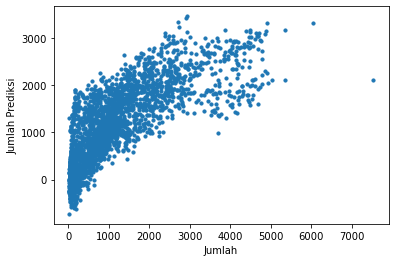

In [70]:
prediksi = modelReg.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

Grafik di atas merupakan grafik perbandingan antara data asli pada y_test dibandingkan dengan hasil tebakan dari X_test untuk Linear Regression.

### ElasticNet

In [71]:
modelE = ElasticNet()

In [72]:
modelE.fit(X_train, y_train)

ElasticNet()

In [73]:
y_pred_E = modelE.predict(X_test)

In [74]:
y_pred_trainE = modelE.predict(X_train)

In [75]:
MAE_E = mean_absolute_error(y_test, y_pred_E)
MSE_E = mean_squared_error(y_test, y_pred_E)
RMSE_E = np.sqrt(MSE_E)
R_square_E = r2_score(y_test, y_pred_E)
R_square_E_train = r2_score(y_train, y_pred_trainE)

In [76]:
modelE.intercept_

2589.4275658816287

In [77]:
pd.DataFrame(index= X_train.columns, data = modelE.coef_, columns = ['Coefficient'])

,Coefficient
t1,42.086649
hum,-25.523536
wind_speed,-5.550732
is_holiday,-8.207502
is_weekend,-56.746599
weather_code_1.0,-34.622748
weather_code_2.0,45.460742
weather_code_3.0,36.735062
weather_code_4.0,-21.074765
weather_code_7.0,-24.252477


Tabel di atas merupakan koefisien dari setiap feature untuk Elasticnet, yang memiliki koefisen tertinggi baik itu negatif atau positif adalah Jam_sore dengan 205 dan Jam_dini hari dengan -242

Text(0, 0.5, 'Jumlah Prediksi')

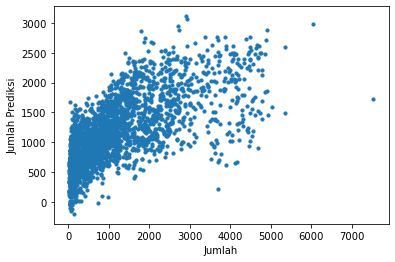

In [78]:
prediksi = modelE.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

Grafik di atas merupakan grafik perbandingan antara data asli pada y_test dibandingkan dengan hasil tebakan dari X_test untuk ElasticNet.

### Random Forest

In [79]:
modelRF = RandomForestRegressor()

In [80]:
modelRF.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
y_rf = modelRF.predict(X_test)

In [82]:
y_pred_trainRF = modelRF.predict(X_train)

In [83]:
MAE_RF = mean_absolute_error(y_test, y_rf)
MSE_RF = mean_squared_error(y_test, y_rf)
RMSE_RF = np.sqrt(MSE_RF)
R_square_RF = r2_score(y_test, y_rf)
R_square_RF_train = r2_score(y_train, y_pred_trainRF)

Text(0, 0.5, 'Jumlah Prediksi')

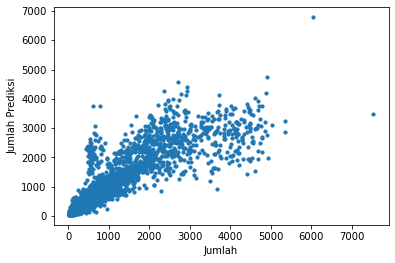

In [84]:
prediksi = modelRF.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

Grafik di atas merupakan grafik perbandingan antara data asli pada y_test dibandingkan dengan hasil tebakan dari X_test untuk Random Forest.

### XGBoost

In [85]:
modelX = XGBRegressor()

In [86]:
modelX.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_pred_X = modelX.predict(X_test)

In [88]:
y_pred_trainX = modelX.predict(X_train)

In [89]:
MAE_X = mean_absolute_error(y_test, y_pred_X)
MSE_X = mean_squared_error(y_test, y_pred_X)
RMSE_X = np.sqrt(MSE_X)
R_square_X = r2_score(y_test, y_pred_X)
R_square_X_train = r2_score(y_train, y_pred_trainX)

Text(0, 0.5, 'Jumlah Prediksi')

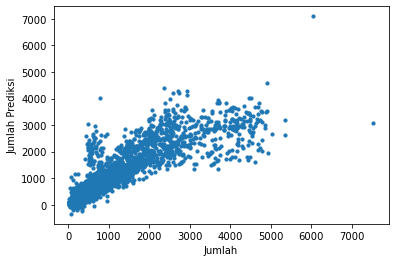

In [90]:
prediksi = modelX.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

Grafik di atas merupakan grafik perbandingan antara data asli pada y_test dibandingkan dengan hasil tebakan dari X_test untuk XGBoost.

## Evaluation Metrics

In [91]:
print("Linear Regression")
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)
print("R_square : ", R_square)
print("R_square_train : ", R_square_train)
print("="*100)
print("ElasticNet")
print("MAE : ", MAE_E)
print("MSE : ", MSE_E)
print("RMSE : ", RMSE_E)
print("R_square : ", R_square_E)
print("R_square_train : ", R_square_E_train)
print("="*100)
print("Random Forest")
print("MAE : ", MAE_RF)
print("MSE : ", MSE_RF)
print("RMSE : ", RMSE_RF)
print("R_square : ", R_square_RF)
print("R_square_train : ", R_square_RF_train)
print("="*100)
print("XGBoost")
print("MAE : ", MAE_X)
print("MSE : ", MSE_X)
print("RMSE : ", RMSE_X)
print("R_square : ", R_square_X)
print("R_square_train : ", R_square_X_train)

Linear Regression
MAE :  501.41338599358255
MSE :  511689.1224152748
RMSE :  715.3244874986979
R_square :  0.5999151578486861
R_square_train :  0.5752564167130071
ElasticNet
MAE :  609.3638511856141
MSE :  719971.1626513915
RMSE :  848.5111446830805
R_square :  0.43706141806722687
R_square_train :  0.40260431798958374
Random Forest
MAE :  338.2628236475605
MSE :  339097.4148414267
RMSE :  582.3207147624295
R_square :  0.7348629670875706
R_square_train :  0.9556634406998923
XGBoost
MAE :  341.4041853851763
MSE :  323570.2475108885
RMSE :  568.8323544867051
R_square :  0.7470035110592163
R_square_train :  0.8431947179176883


Dari keempat algoritmya di atas yang memiliki R_square tertinggi dan MAE, MSE, dan RMSE terendah adalah XGBoost, tetapi model yang dihasilkan masih overfit, sehingga selanjutnya akan dilakukan Hyper Parameter Tunning agar diperoleh model terbaik, algoritma yang akan dilakukan hyper parameter tunning adalah ElasticNet, Random Forest, dan XGBoost.

## Hyper Parameter Tunning

### ElasticNet

In [92]:
paramsE = {
            "alpha": [1,0.1,0.01,0.001],
            "l1_ratio" : [0.1,0.3,0.5,0.7,0.9]
             }


In [93]:
modelE_CV = RandomizedSearchCV(ElasticNet(), paramsE, cv=5, n_iter=100, n_jobs=-1, verbose=1, random_state=1)

In [94]:
modelE_CV.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    6.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished


RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [1, 0.1, 0.01, 0.001],
                                        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
                   random_state=1, verbose=1)

In [95]:
modelE_CV.best_params_

{'l1_ratio': 0.9, 'alpha': 0.001}

In [96]:
score= cross_val_score(ElasticNet(l1_ratio= 0.9, alpha= 0.001), X_train, y_train, cv=5) 
print(score)        
print(score.mean())

[0.5602772  0.57852292 0.57725903 0.56643155 0.58667861]
0.5738338615468507


In [97]:
y_predE_CV = modelE_CV.predict(X_test)

In [98]:
y_predE_CV_train = modelE_CV.predict(X_train)

In [99]:
MAE_E_CV = mean_absolute_error(y_test, y_predE_CV)
MSE_E_CV = mean_squared_error(y_test, y_predE_CV)
RMSE_E_CV = np.sqrt(MSE_E_CV)
R_square_E_CV = r2_score(y_test, y_predE_CV)
R_square_E_CV_train = r2_score(y_train, y_predE_CV_train)

Text(0, 0.5, 'Jumlah Prediksi')

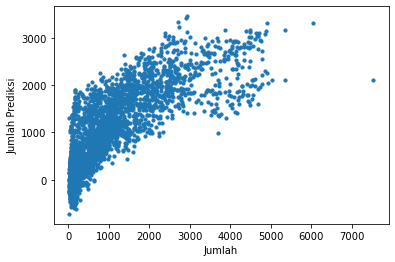

In [100]:
prediksi = modelE_CV.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

### Random Forest

In [134]:
paramsRF = {
            "n_estimators" : [100,120,140,160,180,200],
              "min_samples_split": np.arange(2,16,2),
            "min_samples_leaf": [1,3,5,7],
              "max_depth": ['None',8,9,10,11,12,13,14],
            "max_features":['auto',0.2,0.4,0.5,0.8]
             }

In [135]:
modelRF_CV = RandomizedSearchCV(RandomForestRegressor(), paramsRF, cv=5, n_iter=1000, n_jobs=-1, verbose=1, random_state=1)

In [136]:
modelRF_CV.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 41.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_depth': ['None', 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'max_features': ['auto', 0.2, 0.4, 0.5,
                                                         0.8],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': [100, 120, 140, 160,
                                                         180, 200]},
                   random_state=1, verbose=1)

In [137]:
modelRF_CV.best_params_

{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 0.8,
 'max_depth': 11}

In [144]:
score= cross_val_score(RandomForestRegressor(n_estimators= 200, 
                                             min_samples_split= 12,
                                             min_samples_leaf= 1,
                                             max_features= 0.8,
                                             max_depth= 11), X_train, y_train, cv=5) 
print(score)        
print(score.mean())

[0.73666437 0.73382729 0.7455342  0.73301746 0.74436962]
0.7386825890419285


In [139]:
y_rf_CV = modelRF_CV.predict(X_test)

In [140]:
y_rf_CV_train = modelRF_CV.predict(X_train)

In [141]:
MAE_RF_CV = mean_absolute_error(y_test, y_rf_CV)
MSE_RF_CV = mean_squared_error(y_test, y_rf_CV)
RMSE_RF_CV = np.sqrt(MSE_RF_CV)
R_square_RF_CV = r2_score(y_test, y_rf_CV)
R_square_RF_CV_train = r2_score(y_train, y_rf_CV_train)

Text(0, 0.5, 'Jumlah Prediksi')

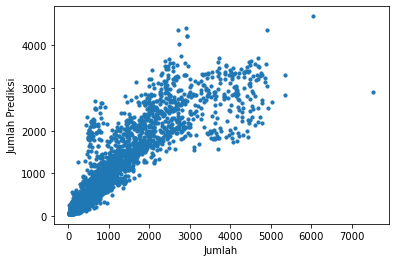

In [142]:
prediksi = modelRF_CV.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

### XGBoost

In [110]:
paramsX = {
 'max_depth': np.arange(1,7,1),
 'learning_rate': [0.001,0.01,0.1,0.3,0.5,0.7,0.9],
 'n_estimators': [100,120,140,160,180,200],
 'subsample': [0.2,0.4,0.6,0.8,1],
 'gamma': np.arange(0,10,2),
 'colsample_bytree': [0.2,0.4,0.6,0.8,1],
 'reg_alpha': np.logspace(-3,0,15),
 'reg_lambda': np.logspace(-3,0,15)
}

In [111]:
modelX_CV = RandomizedSearchCV(XGBRegressor(), paramsX, cv=5, n_iter=1000, n_jobs=-1, verbose=1, random_state=1)

In [112]:
modelX_CV.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 28.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'reg_alpha': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
   

In [113]:
modelX_CV.best_params_

{'subsample': 1,
 'reg_lambda': 0.0071968567300115215,
 'reg_alpha': 0.08483428982440717,
 'n_estimators': 100,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 6,
 'colsample_bytree': 0.8}

In [114]:
score= cross_val_score(XGBRegressor(subsample= 1,
                                    reg_lambda= 0.0071968567300115215,
                                    reg_alpha= 0.08483428982440717,
                                    n_estimators= 100,
                                    max_depth= 6,
                                    learning_rate= 0.1,
                                    gamma= 6,
                                    colsample_bytree= 0.8), X_train, y_train, cv=5) 
print(score)        
print(score.mean())

[0.73257412 0.73357899 0.73991372 0.72724724 0.74093172]
0.7348491561208068


In [115]:
y_X_CV = modelX_CV.predict(X_test)

In [116]:
y_X_CV_train = modelX_CV.predict(X_train)

In [117]:
MAE_X_CV = mean_absolute_error(y_test, y_X_CV)
MSE_X_CV = mean_squared_error(y_test, y_X_CV)
RMSE_X_CV = np.sqrt(MSE_X_CV)
R_square_X_CV = r2_score(y_test, y_X_CV)
R_square_X_CV_train = r2_score(y_train, y_X_CV_train)

Text(0, 0.5, 'Jumlah Prediksi')

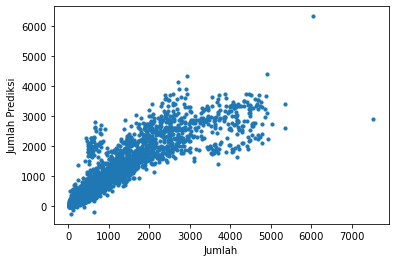

In [118]:
prediksi = modelX_CV.predict(X_test)

plt.scatter(y_test,prediksi,s=10)
plt.xlabel('Jumlah')

plt.ylabel('Jumlah Prediksi')

## Evaluation Metrics

In [143]:
print("ElasticNet")
print("MAE : ", MAE_E_CV)
print("MSE : ", MSE_E_CV)
print("RMSE : ", RMSE_E_CV)
print("R_square : ", R_square_E_CV)
print("R_square_train : ", R_square_E_CV_train)
print("="*100)
print("Random Forest")
print("MAE : ", MAE_RF_CV)
print("MSE : ", MSE_RF_CV)
print("RMSE : ", RMSE_RF_CV)
print("R_square : ", R_square_RF_CV)
print("R_square_train : ", R_square_RF_CV_train)
print("="*100)
print("XGBoost")
print("MAE : ", MAE_X_CV)
print("MSE : ", MSE_X_CV)
print("RMSE : ", RMSE_X_CV)
print("R_square : ", R_square_X_CV)
print("R_square_train : ", R_square_X_CV_train)

ElasticNet
MAE :  501.2991632231954
MSE :  511619.9698827833
RMSE :  715.2761493876217
R_square :  0.5999692275539704
R_square_train :  0.5752518257664998
Random Forest
MAE :  323.0144860127709
MSE :  299387.76627666963
RMSE :  547.1633817030062
R_square :  0.7659115623809865
R_square_train :  0.7899419853984858
XGBoost
MAE :  322.70033777887136
MSE :  295982.40377513255
RMSE :  544.0426488568085
R_square :  0.7685741828261202
R_square_train :  0.7884211356164129


Setelah dilakukan hyper parameter tunning pada ketiga algoritma tersebut ternyata model yang terbaik adalah dengan menggunakan XGBoost karena memiliki R_square tertinggi dan MAE, MSE, RMSE terendah dibandingkan dengan algoritma lain, dan model sudah lebih baik tidak overfit.

### Kesimpulan Model

Dari 4 algoritma yang digunakan baik sebelum dan sesudah hyper parameter tunning, algoritma yang paling terbaik adalah XGBoost setelah hyper parameter tunning dengan R2 score saat test sebesar 0.768, dan algoritma yang akan digunakan untuk model ini adalah model XGBoost tersebut.

In [133]:
# with open ('Model', 'wb') as ML:
#     pickle.dump(modelX_CV, ML)

# Kesimpulan dan Saran

Berdasarkan hasil data analisis jumlah penyewaan sepeda pada hari libur ataupun akhir pekan lebih rendah dibandingkan dengan selain hari libur atau akhir pekan, karena kemungkinan lebih banyak yang menggunakan penyewaan sepeda untuk berangkat atau pulang kerja. Bisa dilihat dari jam pada saat selain akhir pekan dan hari libur, jumlah penyewaan sepeda tertinggi pada saat jam berangkat dan pulang kerja berbeda cukup signifikan jika dibandingkan dengan jam selain jam berangkat dan pulang kerja, tetapi jika pada saat akhir pekan dan hari libur jumlah penyewaan sepeda tertinggi terjadi pada saat siang hingga menjelang sore. Bahkan baik itu saat musim semi, musim panas, musim gugur ataupun musim dingin jumlah penyewaan sepeda paling tinggi terjadi saat jam berangkan dan pulang kerja. Jika dilihat berdasarkan musim jumlah tertinggi penyewaan sepeda terjadi pada musim panas dan paling rendah terjadi pada saat musim dingin baik itu saat akhir pekan, hari libur ataupun hari biasa, mungkin dikarenakan faktor cuaca yang cukup berbeda yang mempengaruhi jumlah penyewaan sepeda berdasarkan musim. Jika kita lihat berdasarkan bulan pun penyewaan sepeda tertinggi terjadi pada bulan Juni, July dan Agustus yang merupakan bulan saat terjadinya musim panas, dan tertinggi adalah pada saat bulan July yang merupakan puncak musim panas. Jika berdasarkan cuaca, pada saat cuaca cerah ataupun sedikit berawan lebih tinggi dibandingkan saat hujan ataupun turun salju baik itu saat akhir pekan, hari libur ataupun hari biasa. Berdasarkan faktor-faktor di atas tentunya para pelaku bisnis rental sepeda ingin memeperoleh keuntungan yang maksimaal setiap waktu ataupun keadaan bagaimanapun. Tentunya untuk memperoleh keuntungan maksimal pelaku bisnis haru mengetahui berapa kira-kira pelanggan yang akan melakukan penyewaan sepeda agar pelaku bisnis sepeda ataupun orang yang akan memulai bisnis sepeda bisa menentukkan berapa jumlah sepeda yang akan dikerahkan untuk memperoleh keuntungan yang maksimal, atau bahkan memaksimalkan jumlah sepeda yang ada jika diprediksi jumlah penyewaan sepeda pada saat itu lebih rendah dibandingkan jumlah sepeda yang telah disediakan. Dengan dibuatkannya model ini diharapkan dapat membantu para pelaku bisnis sepeda maupun yang akan memulai bisnis sepeda untuk memprediksi berapa jumlah pelanggan yang akan melakukan penyewaan sepeda pada saat itu. Karena jika misalkan pada saat jam tersebut sepeda yang tersedia hanya dapat menampung 50 orang, lalu diprediksi oleh model misal pada saat tersebut jumlah penyewa sepeda ada 75 orang, dan kenyataannya ada 100 orang, jika kita misal biaya rental 1 jam adalah Rp.25.000 maka anda kehilangan keuntungan sebesar Rp.1.250.000 pada kenyataannya, tetapi dengan bantuan model setidaknya anda memperoleh kentungan tambahan sekitar Rp. 625.000 atau hanya kehilangan keuntungan sebesar Rp.625.000 jika diabndingkan dengan kenyataan yang terjadi. Atau misal sepeda yang telah dikerahkan pada saat jam tersebut bisa menampung 100 orang, tetapi oleh model diprediksi yang akan melakukan penyewaan sepeda lebih rendah dari jumlah tersebut dan begitupun pada kenyataannya, tentunya dengan telah diprediksi bahwa jumlah penyewa pada saat tersebut kurang dari jumlah sepeda yang tersedia pihak penyewaan sepeda bisa mempersiapkan untuk memberikan tawaran-tawaran atau promo agar jumlah sepeda yang ada sepenuhnya bisa terpakai.

## Saran

1. Berdasarkan hasil hasil analisis data pihak penyedia jasa rental sepeda bisa memberikan promo pada saat akhir pekan atau hari libur agar dapat meningkatkan jumlah penyewaan sepeda pada hari-hari tersebut.
2. Penyedia jasa rental sepeda bisa memberikan tambahan fasilitas yang mendukung pelanggan untuk bersepeda pada saat cuaca hujan ataupun salju demi meningkatkan jumlah penyewaan sepeda.
3. Penyedia jasa rental sepeda bisa memberikan penawaran menarik pada saat jam-jam diluar jam berangkat dan pulang kerja demi meningkatkan jumlah penyewaan sepeda.
4. Penyedia jasa rental sepeda diharapkan dapat memberikan fasilitas atau bantuan yang dapat meningkatkan jumlah pelanggan pada saat selain musim panas terutama pada saat musim dingin.
5. Jika permintaan jumlah penyewaan sepeda sedang para pelaku bisnis bisa menaikan harga sewa untuk memperoleh keuntungan yang maksimal.
6. Pelaku bisnis rental sepeda dapat memaksimalkan model yang terlah dibuat agar membantu dalam memperoleh keuntungan yang maksimal.


Sumber data yang digunakan : https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset